In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

# Loading full skeleton

In [92]:
merged_full_skeleton = pd.read_csv('Full_merged_skeleton_1.2.1.csv')



# Creating skeleton of a region

In [102]:
bodyid_list = pd.read_csv('ME(R)_3721.csv')['bodyId'].to_list()
skeleton_part_merged = merged_full_skeleton[merged_full_skeleton['bodyId'].isin(bodyid_list)]
skeleton_part_merged

,rowId_1,x_1,y_1,z_1,radius_1,bodyId,rowId_2,x_2,y_2,z_2,link,radius_2
24422128,1,9192.0,17552.0,9100.0,12.0000,543702186,2,9192.0,17576.0,9100.0,1.0,12.0000
24422129,2,9192.0,17576.0,9100.0,12.0000,543702186,3,9216.0,17600.0,9100.0,2.0,21.9411
24422130,3,9216.0,17600.0,9100.0,21.9411,543702186,4,9264.0,17648.0,9100.0,3.0,21.9411
24422131,4,9264.0,17648.0,9100.0,21.9411,543702186,5,9336.0,17696.0,9100.0,4.0,63.8947
24422132,5,9336.0,17696.0,9100.0,63.8947,543702186,6,9432.0,17696.0,9100.0,5.0,84.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
170418478,15257,13976.0,11862.0,30668.0,11.0000,7112616299,15258,13954.0,11840.0,30690.0,15257.0,11.0000
170418479,15258,13954.0,11840.0,30690.0,11.0000,7112616299,15259,13954.0,11818.0,30690.0,15258.0,11.0000
170418480,15259,13954.0,11818.0,30690.0,11.0000,7112616299,15260,13932.0,11796.0,30712.0,15259.0,11.0000
170418481,15260,13932.0,11796.0,30712.0,11.0000,7112616299,15261,13932.0,11774.0,30712.0,15260.0,11.0000


In [103]:
skeleton_part_merged.to_csv('merged_skeleton_ME(R)_3721.csv')

# Finding bounding box of a region

In [2]:
skeleton_part_merged = pd.read_csv('merged_skeleton_ME(R)_3721.csv')
skeleton_part_merged.drop('Unnamed: 0',axis=1,inplace=True)
skeleton_part_merged

,rowId_1,x_1,y_1,z_1,radius_1,bodyId,rowId_2,x_2,y_2,z_2,link,radius_2
0,1,9192.0,17552.0,9100.0,12.0000,543702186,2,9192.0,17576.0,9100.0,1.0,12.0000
1,2,9192.0,17576.0,9100.0,12.0000,543702186,3,9216.0,17600.0,9100.0,2.0,21.9411
2,3,9216.0,17600.0,9100.0,21.9411,543702186,4,9264.0,17648.0,9100.0,3.0,21.9411
3,4,9264.0,17648.0,9100.0,21.9411,543702186,5,9336.0,17696.0,9100.0,4.0,63.8947
4,5,9336.0,17696.0,9100.0,63.8947,543702186,6,9432.0,17696.0,9100.0,5.0,84.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
1458513,15257,13976.0,11862.0,30668.0,11.0000,7112616299,15258,13954.0,11840.0,30690.0,15257.0,11.0000
1458514,15258,13954.0,11840.0,30690.0,11.0000,7112616299,15259,13954.0,11818.0,30690.0,15258.0,11.0000
1458515,15259,13954.0,11818.0,30690.0,11.0000,7112616299,15260,13932.0,11796.0,30712.0,15259.0,11.0000
1458516,15260,13932.0,11796.0,30712.0,11.0000,7112616299,15261,13932.0,11774.0,30712.0,15260.0,11.0000


In [3]:
skeleton_part_merged = skeleton_part_merged
def bounding_box_from_merged_skeleton(merged_skeleton_dataset):
    x_min = np.min([np.min(merged_skeleton_dataset['x_1']),np.min(merged_skeleton_dataset['x_2'])])
    x_max = np.max([np.max(merged_skeleton_dataset['x_1']),np.max(merged_skeleton_dataset['x_2'])])

    y_min = np.min([np.min(merged_skeleton_dataset['y_1']),np.min(merged_skeleton_dataset['y_2'])])
    y_max = np.max([np.max(merged_skeleton_dataset['y_1']),np.max(merged_skeleton_dataset['y_2'])])

    z_min = np.min([np.min(merged_skeleton_dataset['z_1']),np.min(merged_skeleton_dataset['z_2'])])
    z_max = np.max([np.max(merged_skeleton_dataset['z_1']),np.max(merged_skeleton_dataset['z_2'])])

    return [x_min,x_max,y_min,y_max,z_min,z_max]
bounds = bounding_box_from_merged_skeleton(skeleton_part_merged)
bounding_box_volume = abs(bounds[0] - bounds[1]) * abs(bounds[2] - bounds[3]) * abs(bounds[4] - bounds[5])

# Computing total volume 

Truncated cone volume - V = 1/3 * Pi (r_1^2 + r_2^2 + r_1*r_2) *h

In [4]:
skeleton_part_merged['distance'] = np.sqrt((skeleton_part_merged['x_2']-  skeleton_part_merged['x_1'])**2 +  
                                           (skeleton_part_merged['y_2']-  skeleton_part_merged['y_1'])**2 +
                                           (skeleton_part_merged['z_2']-  skeleton_part_merged['z_1'])**2 )
skeleton_part_merged

,rowId_1,x_1,y_1,z_1,radius_1,bodyId,rowId_2,x_2,y_2,z_2,link,radius_2,distance
0,1,9192.0,17552.0,9100.0,12.0000,543702186,2,9192.0,17576.0,9100.0,1.0,12.0000,24.000000
1,2,9192.0,17576.0,9100.0,12.0000,543702186,3,9216.0,17600.0,9100.0,2.0,21.9411,33.941125
2,3,9216.0,17600.0,9100.0,21.9411,543702186,4,9264.0,17648.0,9100.0,3.0,21.9411,67.882251
3,4,9264.0,17648.0,9100.0,21.9411,543702186,5,9336.0,17696.0,9100.0,4.0,63.8947,86.533231
4,5,9336.0,17696.0,9100.0,63.8947,543702186,6,9432.0,17696.0,9100.0,5.0,84.0000,96.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458513,15257,13976.0,11862.0,30668.0,11.0000,7112616299,15258,13954.0,11840.0,30690.0,15257.0,11.0000,38.105118
1458514,15258,13954.0,11840.0,30690.0,11.0000,7112616299,15259,13954.0,11818.0,30690.0,15258.0,11.0000,22.000000
1458515,15259,13954.0,11818.0,30690.0,11.0000,7112616299,15260,13932.0,11796.0,30712.0,15259.0,11.0000,38.105118
1458516,15260,13932.0,11796.0,30712.0,11.0000,7112616299,15261,13932.0,11774.0,30712.0,15260.0,11.0000,22.000000


In [5]:
skeleton_part_merged['volume'] = 1/3 * np.pi * (skeleton_part_merged['radius_1']**2 + skeleton_part_merged['radius_2']**2 + skeleton_part_merged['radius_1']*skeleton_part_merged['radius_2'])*skeleton_part_merged['distance']
skeleton_part_merged

,rowId_1,x_1,y_1,z_1,radius_1,bodyId,rowId_2,x_2,y_2,z_2,link,radius_2,distance,volume
0,1,9192.0,17552.0,9100.0,12.0000,543702186,2,9192.0,17576.0,9100.0,1.0,12.0000,24.000000,1.085734e+04
1,2,9192.0,17576.0,9100.0,12.0000,543702186,3,9216.0,17600.0,9100.0,2.0,21.9411,33.941125,3.158730e+04
2,3,9216.0,17600.0,9100.0,21.9411,543702186,4,9264.0,17648.0,9100.0,3.0,21.9411,67.882251,1.026651e+05
3,4,9264.0,17648.0,9100.0,21.9411,543702186,5,9336.0,17696.0,9100.0,4.0,63.8947,86.533231,5.406111e+05
4,5,9336.0,17696.0,9100.0,63.8947,543702186,6,9432.0,17696.0,9100.0,5.0,84.0000,96.000000,1.659333e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458513,15257,13976.0,11862.0,30668.0,11.0000,7112616299,15258,13954.0,11840.0,30690.0,15257.0,11.0000,38.105118,1.448500e+04
1458514,15258,13954.0,11840.0,30690.0,11.0000,7112616299,15259,13954.0,11818.0,30690.0,15258.0,11.0000,22.000000,8.362920e+03
1458515,15259,13954.0,11818.0,30690.0,11.0000,7112616299,15260,13932.0,11796.0,30712.0,15259.0,11.0000,38.105118,1.448500e+04
1458516,15260,13932.0,11796.0,30712.0,11.0000,7112616299,15261,13932.0,11774.0,30712.0,15260.0,11.0000,22.000000,8.362920e+03


In [6]:
total_density = skeleton_part_merged['volume'].sum()/bounding_box_volume
print('Total density is:', total_density )

Total density is: 0.008024362653834338


# Computing local distribution of volume density
border cases not included

In [55]:
x_axis = np.linspace(bounds[0],bounds[1],20)
y_axis = np.linspace(bounds[2],bounds[3],20)
z_axis = np.linspace(bounds[4],bounds[5],20)

In [56]:
all_volumes = []
all_densities = []
count = 0
for i in range(len(x_axis)-1):
    print('Count:',count)
    x_lower = skeleton_part_merged[(skeleton_part_merged['x_1'] > x_axis[i]) & (skeleton_part_merged['x_2'] > x_axis[i])]
    x_higher = x_lower[ (x_lower['x_1']< x_axis[i+1]) & (x_lower['x_2']< x_axis[i+1])]
    for j in range(len(y_axis)-1):
        y_lower = x_higher[(x_higher['y_1'] > y_axis[j])&(x_higher['y_2'] > y_axis[j])]
        y_higher = y_lower [(y_lower['y_1']< y_axis[j+1])&(y_lower['y_2']< y_axis[j+1])]
        for k in range(len(z_axis)-1):
            z_lower = y_higher[(y_higher['z_1'] > z_axis[k]) & (y_higher['z_2'] > z_axis[k] )]
            z_higher =  z_lower[(z_lower['z_1']< z_axis[k+1]) & ( z_lower['z_2']< z_axis[k+1])]
            bounding_box_volume = abs((x_axis[i+1] - x_axis[i])) * abs((y_axis[j+1] - y_axis[j])) * abs((z_axis[k+1]- z_axis[k]))
            all_volumes.append(z_higher['volume'].sum())
            all_densities.append(z_higher['volume'].sum()/bounding_box_volume)
    count += 1

Count: 0
Count: 1
Count: 2
Count: 3
Count: 4
Count: 5
Count: 6
Count: 7
Count: 8
Count: 9
Count: 10
Count: 11
Count: 12
Count: 13
Count: 14
Count: 15
Count: 16
Count: 17
Count: 18


Text(0.5, 1.0, 'Distribution of local physical density.Space was divided in 729 equal boxes')

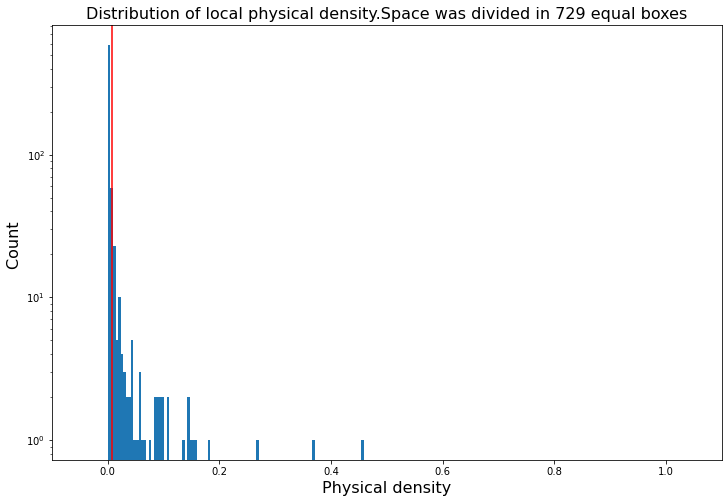

In [12]:
plt.figure(figsize=(12,8))
plt.hist(all_densities,bins=100)
plt.xlim(-0.1,1.1)
plt.axvline(total_density,c='red')
plt.yscale('log')
plt.xlabel('Physical density')
plt.ylabel('Count ')
plt.title('Distribution of local physical density.Space was divided in ' + str(len(all_volumes)) + ' equal boxes')

# Bar plot of density distributions

Number of sides: 3
Number of sides: 5
Number of sides: 10
Number of sides: 20
Number of sides: 40


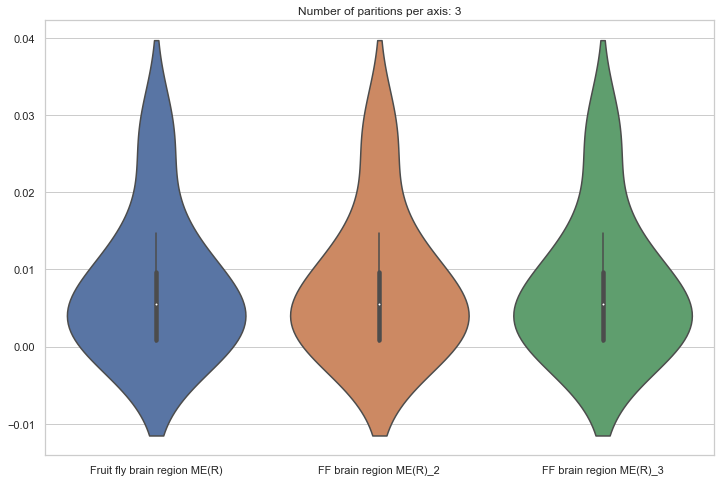

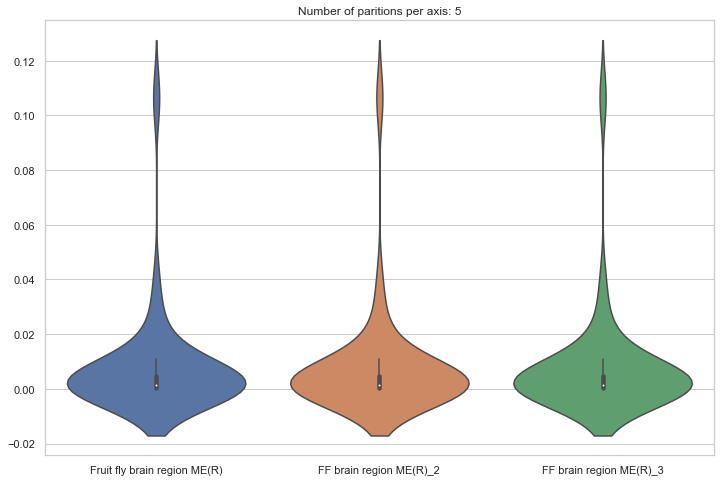

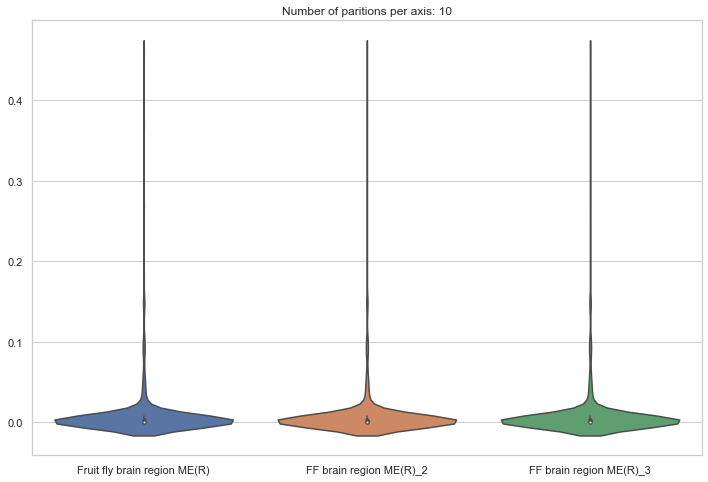

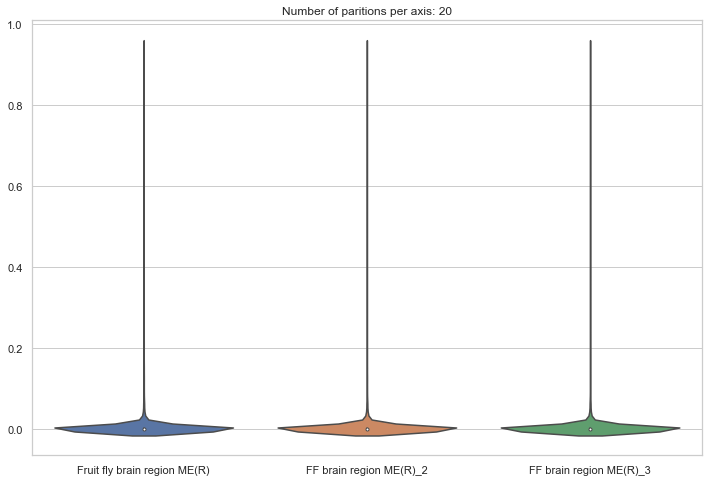

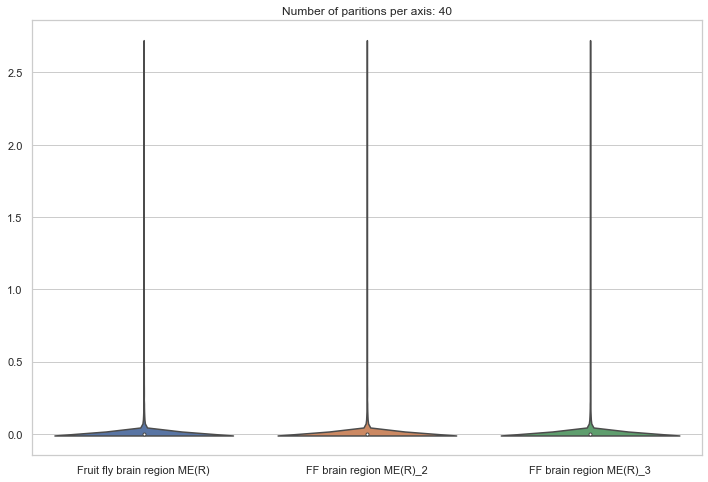

In [62]:
import seaborn as sns

number_of_sides = [3,5,10,20,40]
for n in number_of_sides:
    print("Number of sides:",n)
    x_axis = np.linspace(bounds[0],bounds[1],n)
    y_axis = np.linspace(bounds[2],bounds[3],n)
    z_axis = np.linspace(bounds[4],bounds[5],n)
    
    all_densities = []
    count = 0

    for i in range(len(x_axis)-1):
        #print('Count:',count)
        x_lower = skeleton_part_merged[(skeleton_part_merged['x_1'] > x_axis[i]) & (skeleton_part_merged['x_2'] > x_axis[i])]
        x_higher = x_lower[ (x_lower['x_1']< x_axis[i+1]) & (x_lower['x_2']< x_axis[i+1])]
        for j in range(len(y_axis)-1):
            y_lower = x_higher[(x_higher['y_1'] > y_axis[j])&(x_higher['y_2'] > y_axis[j])]
            y_higher = y_lower [(y_lower['y_1']< y_axis[j+1])&(y_lower['y_2']< y_axis[j+1])]
            for k in range(len(z_axis)-1):
                z_lower = y_higher[(y_higher['z_1'] > z_axis[k]) & (y_higher['z_2'] > z_axis[k] )]
                z_higher =  z_lower[(z_lower['z_1']< z_axis[k+1]) & ( z_lower['z_2']< z_axis[k+1])]
                bounding_box_volume = abs((x_axis[i+1] - x_axis[i])) * abs((y_axis[j+1] - y_axis[j])) * abs((z_axis[k+1]- z_axis[k]))
                all_volumes.append(z_higher['volume'].sum())
                all_densities.append(z_higher['volume'].sum()/bounding_box_volume)
        count += 1
    plt.figure(figsize=(12,8))
    plt.title('Number of paritions per axis: ' + str(n))
    data = pd.DataFrame({'Fruit fly brain region ME(R)':all_densities,'FF brain region ME(R)_2':all_densities,'FF brain region ME(R)_3':all_densities})
    sns.set_theme(style="whitegrid")
    ax = sns.violinplot(data=data)